<AxesSubplot:title={'center':'Pistol and Overall Win Rate % vs Teams'}, xlabel='Teams', ylabel='Overall Win Rate (%)'>

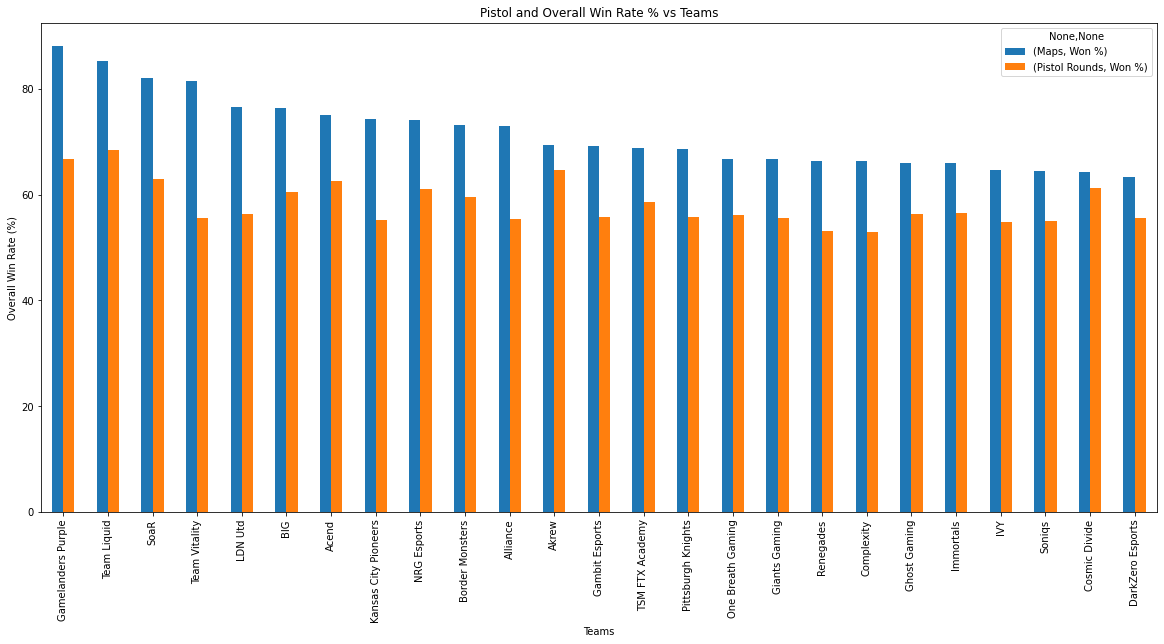

In [ ]:
from IPython.core.display import display, HTML
from pip._vendor import requests
import pandas as pd
from bs4 import BeautifulSoup
import warnings

import csv
import requests
import numpy as np
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

headers = {
        "referer": "https://www.thespike.gg/",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

url = requests.get("https://www.thespike.gg/stats/teams?no_of_maps=25&region=all&date=90&map=all&team_rank=30", headers=headers)
content = url.text

soup = BeautifulSoup(content , 'html5lib')

table = soup.find_all("table" , {"class": "sortable-table"})

dfTeams = pd.read_html(str(table))[0]

dfTeams[[('Unnamed: 0_level_0', 'Team'),('Maps', 'Won %')]]

dfTeams.rename(columns={'Unnamed: 0_level_0': 'Team Names'}, inplace=True)

dfTeams = dfTeams.sort_values([('Maps', 'Won %')], ascending = False)

#Resetting the indexes in the dataframe to go from 0 to 26 again
dfTeams.reset_index( drop=True, inplace=True)

dfTeams = dfTeams.head(25)

dfTeams.to_csv("top25TeamsSorted.csv", index = False)

for i in range(25):
    dfTeams[('Maps', 'Won %')][i] = float(dfTeams[('Maps', 'Won %')][i].replace("%", ""))
    dfTeams[('Def Rounds', 'Won %')][i] = float(dfTeams[('Def Rounds', 'Won %')][i].replace("%", ""))
    dfTeams[('Atk Rounds', 'Won %')][i] = float(dfTeams[('Atk Rounds', 'Won %')][i].replace("%", ""))
    dfTeams[('Pistol Rounds', 'Won %')][i] = float(dfTeams[('Pistol Rounds', 'Won %')][i].replace("%", ""))

plt.rcParams["figure.figsize"] = [20,9]

dfTeams.plot(x=('Team Names', 'Team'), y=[('Maps', 'Won %'), ('Pistol Rounds', 'Won %')], kind="bar", xlabel="Teams", ylabel="Overall Win Rate (%)", title="Pistol and Overall Win Rate % vs Teams")

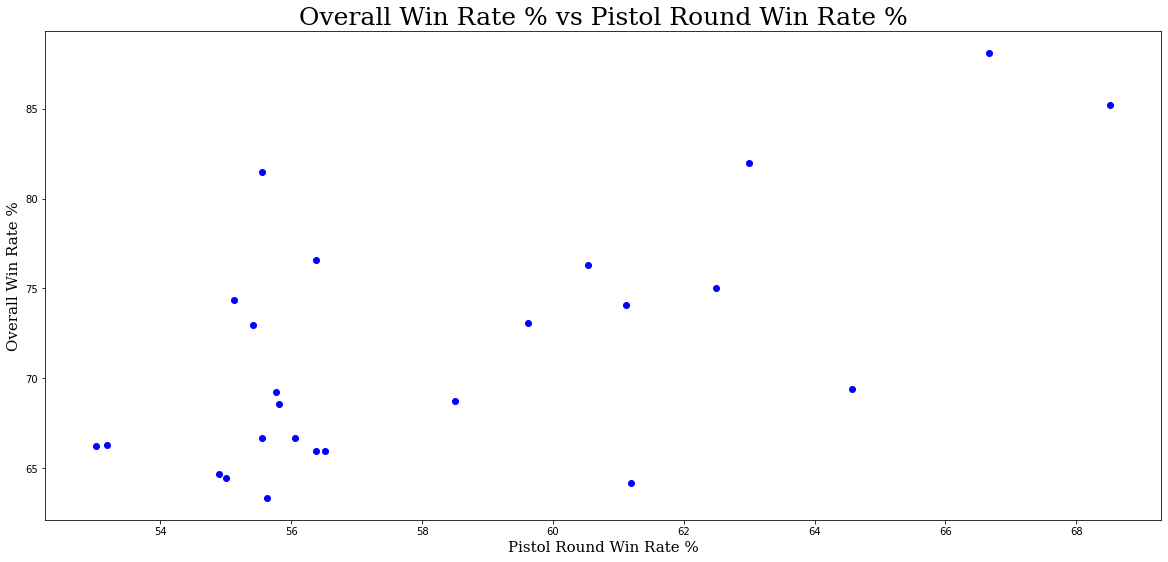

In [ ]:
plt.scatter(dfTeams[('Pistol Rounds', 'Won %')], dfTeams[('Maps', 'Won %')], color='blue')

titleFont = {'family':'serif','color':'black','size':25}
labelFont = {'family':'serif','color':'black','size':15}

plt.title("Overall Win Rate % vs Pistol Round Win Rate %", fontdict=titleFont)
plt.text
plt.xlabel("Pistol Round Win Rate %", fontdict=labelFont)
plt.ylabel("Overall Win Rate %", fontdict=labelFont)
plt.show()

<AxesSubplot:title={'center':'# of players in top 2000 ranking'}, xlabel='Teams', ylabel='Number of Top Players'>

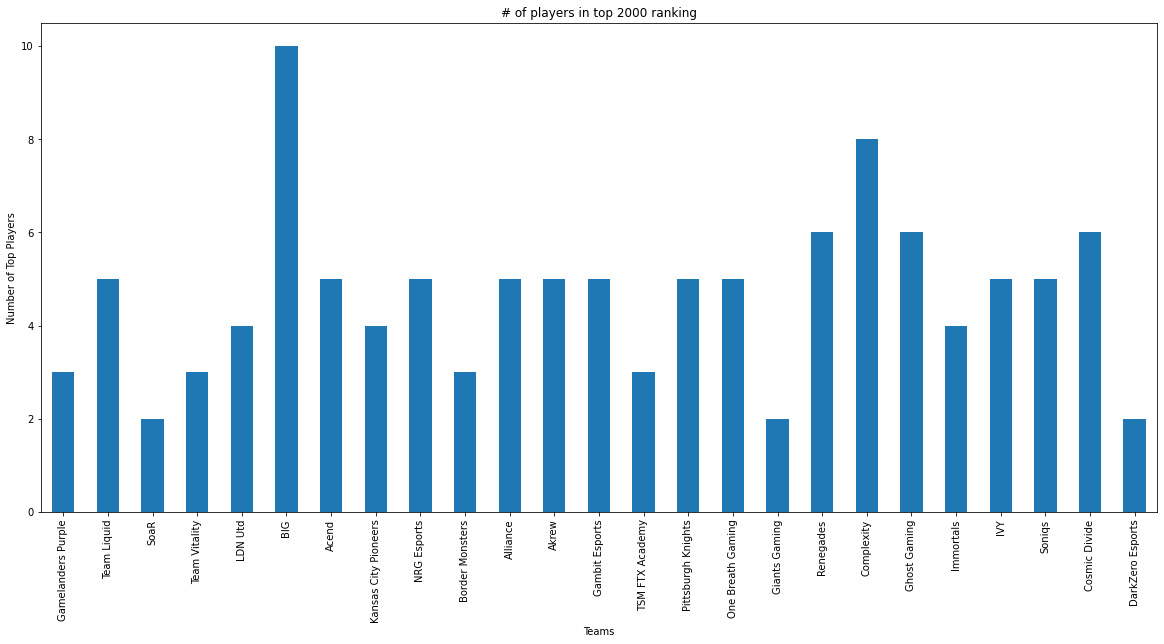

In [ ]:

dfTeamsList = dfTeams[('Team Names', 'Team')]

headers = {
        "referer": "https://www.thespike.gg/",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

url = requests.get("https://www.thespike.gg/stats/players", headers=headers)

content = url.text

soup = BeautifulSoup(content , 'html5lib')

table = soup.find_all("table" , {"class": "sortable-table"})

dfPlayers = pd.read_html(str(table))[0]
# df

# print(dfTeams)

# df.rename(columns={'Unnamed: 0_level_0': 'Team Names'}, inplace=True)

# df = df.sort_values([('Maps', 'Won %')], ascending = False)

if isinstance(dfTeamsList, pd.Series):
    dfTeamsList = dfTeamsList.to_frame()
    dfTeamsList.insert(1, "Counter", [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], True)

# print(dfTeams.columns)

dfPlayersFilter = dfPlayers["Player"].head(2000)

for player in dfPlayersFilter:
    for team in dfTeamsList[('Team Names', 'Team')]:
        if team in player:
            index = dfTeamsList.loc[dfTeamsList[('Team Names', 'Team')] == team].index.tolist()[0]
            dfTeamsList.iloc[index, 1] += 1
            # print(player)
dfTeamsList


dfTeamsList.plot(x=('Team Names', 'Team'), y=('Counter', ''), kind="bar", xlabel="Teams", ylabel="Number of Top Players", title="# of players in top 2000 ranking", legend=False )

[]


,Agents,Pick Rate,Win Rate
0,"[Sova, Jett, Killjoy, Skye, Astra]",9.33% ( 1378 out of 14764 ),52.83% ( 728 out of 1378 )
1,"[Sage, Viper, Sova, Jett, Reyna]",7.84% ( 1157 out of 14764 ),49.44% ( 572 out of 1157 )
2,"[Cypher, Sova, Jett, Skye, Astra]",5.04% ( 744 out of 14764 ),45.56% ( 339 out of 744 )
3,"[Sage, Viper, Sova, Jett, Killjoy]",4.79% ( 707 out of 14764 ),53.89% ( 381 out of 707 )
4,"[Cypher, Viper, Sova, Jett, Skye]",4.21% ( 622 out of 14764 ),53.05% ( 330 out of 622 )
...,...,...,...
711,"[Sage, Viper, Sova, Yoru, Chamber]",0.01% ( 1 out of 14764 ),0.00% ( 0 out of 1 )
712,"[Raze, Omen, Skye, Yoru, Chamber]",0.01% ( 1 out of 14764 ),0.00% ( 0 out of 1 )
713,"[Sage, Jett, Astra, KAY/O, Chamber]",0.01% ( 1 out of 14764 ),0.00% ( 0 out of 1 )
714,"[Raze, Viper, Sova, Jett, Chamber]",0.01% ( 1 out of 14764 ),0.00% ( 0 out of 1 )


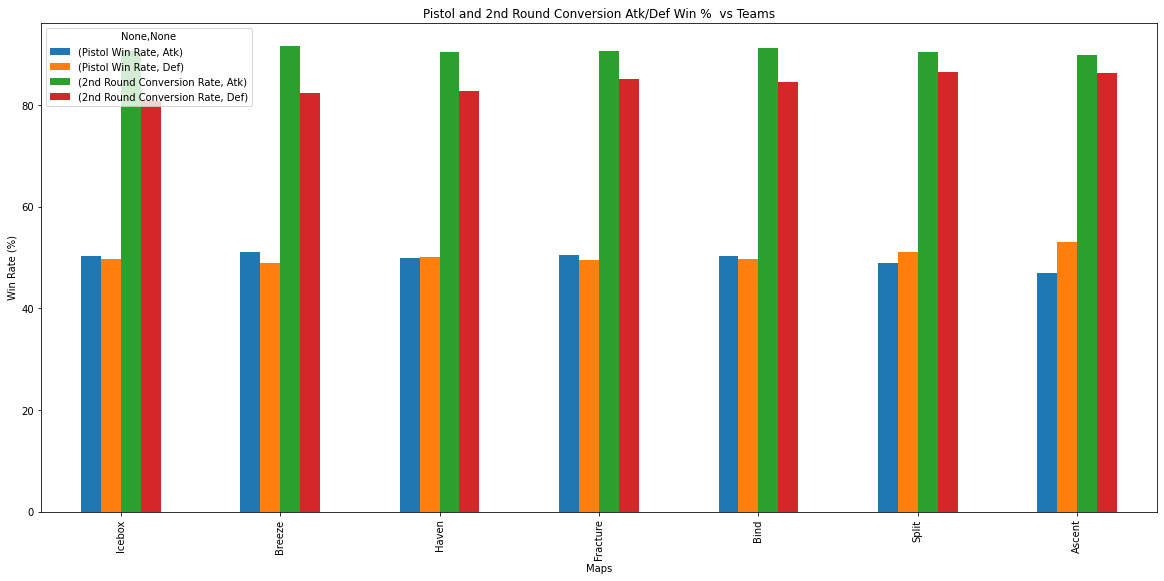

In [5]:
url = requests.get("https://www.thespike.gg/stats/maps", headers=headers)

content = url.text

soup = BeautifulSoup(content , 'html5lib')

table = soup.find_all("table" , {"class": "sortable-table"})

df = pd.read_html(str(table))[0]

df[[('Unnamed: 0_level_0', 'Map'),('Win Rate', 'Atk')]]

df.rename(columns={'Unnamed: 0_level_0': 'Map Names'}, inplace=True)
df.rename(columns={'Unnamed: 1_level_0': ''}, inplace=True)
df.rename(columns={'Unnamed: 2_level_0': ''}, inplace=True)
df.rename(columns={'Unnamed: 3_level_0': ''}, inplace=True)

df = df.sort_values([('Win Rate', 'Atk')], ascending = False)

dfMaps = df[('Map Names', 'Map')]

df

df.to_csv("Maps.csv", index = False)

for i in range(7):
    df[('Pistol Win Rate', 'Atk')][i] = float(df[('Pistol Win Rate', 'Atk')][i].replace("%", ""))
    df[('Pistol Win Rate', 'Def')][i] = float(df[('Pistol Win Rate', 'Def')][i].replace("%", ""))
    df[('2nd Round Conversion Rate', 'Atk')][i] = float(df[('2nd Round Conversion Rate', 'Atk')][i].replace("%", ""))
    df[('2nd Round Conversion Rate', 'Def')][i] = float(df[('2nd Round Conversion Rate', 'Def')][i].replace("%", ""))

plt.rcParams["figure.figsize"] = [20,9]

df.plot(x=('Map Names', 'Map'), y=[('Pistol Win Rate', 'Atk'), ('Pistol Win Rate', 'Def'), ('2nd Round Conversion Rate', 'Atk'), ('2nd Round Conversion Rate', 'Def')], kind="bar", xlabel="Maps", ylabel="Win Rate (%)", title="Pistol and 2nd Round Conversion Atk/Def Win %  vs Teams")


# Agents cell

headers = {
        "referer": "https://www.thespike.gg/",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

url = requests.get("https://www.thespike.gg/stats/agents", headers=headers)

content = url.text

soup = BeautifulSoup(content , 'html5lib')

table = soup.find_all("table" , {"class": "sortable-table"})

table

dfTeamComps = pd.read_html(str(table))[1]

tags = soup.findAll('img')

all_agents = []
team_compositions = []

for tag in tags:
    all_agents.append(tag.get('title'))
all_agents = list(filter((None).__ne__, all_agents))

counter = 0
while counter <= len(all_agents):
    team_compositions.append(all_agents[counter:(counter+5)])
    counter += 5

print (team_compositions.pop())

dfTeamComps['Agents'] = team_compositions

dfTeamComps

In [6]:
headers = {
        "referer": "https://www.thespike.gg/",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

url = requests.get("https://www.thespike.gg/stats/teams?no_of_maps=25&region=all&date=90&map=all&team_rank=30", headers=headers)
content = url.text

soup = BeautifulSoup(content , 'html5lib')

links = []
for table in soup.findAll('table', {'class': 'sortable-table'}):
    for tr in table.findAll('tr'):
        for a in tr.findAll('a'):
            links.append("https://www.thespike.gg/team/agents" + a['href'][5:])

# print(links)

DictTeams = []

for link in links:
    # print(link)
    url2 = requests.get(link, headers=headers)
    content2 = url2.text
    soup2 = BeautifulSoup(content2 , 'html5lib')
    # print(soup2)


    errorCheck = soup2.find('div', {"class": "error-404-content"})
    if errorCheck != None:
        # print(link)
        Dict = {"Phoenix": 0, 
            "Breach": 0,
            "Brimstone": 0,
            "Sage": 0,
            "Raze": 0,
            "Omen": 0,
            "Cypher": 0,
            "Viper": 0,
            "Jett": 0,
            "Reyna": 0,
            "Killjoy": 0,
            "Skye": 0,
            "Yoru": 0,
            "Astra": 0,
            "KAY/O": 0}
        DictTeams.append(Dict)
        continue


    chart2 = soup2.find('div', {"class": "agent-map-statistics-graph"})
    # print(chart2)
    allp = chart2.findAll('p', {"class": "number"})

    Dict = {"Phoenix": 0, 
            "Breach": 0,
            "Brimstone": 0,
            "Sage": 0,
            "Raze": 0,
            "Omen": 0,
            "Cypher": 0,
            "Viper": 0,
            "Jett": 0,
            "Reyna": 0,
            "Killjoy": 0,
            "Skye": 0,
            "Yoru": 0,
            "Astra": 0,
            "KAY/O": 0,
            "Chamber": 0}

    agentPickNum = []

    for elem in allp:
        # print(elem.text)
        agentPickNum.append(int(elem.text))

    # print(agentPickNum)
    index = 0
    for key in Dict:
        Dict[key] = agentPickNum[index]
        index+=1

    Dict = dict(sorted(Dict.items(), key=lambda item: item[1]))
    # print(Dict)
    DictTeams.append(Dict)    
    # print(DictTeams)

print(DictTeams)


[{'Astra': 0, 'Chamber': 10, 'Brimstone': 22, 'Phoenix': 30, 'Killjoy': 56, 'Breach': 69, 'Omen': 142, 'Cypher': 149, 'Viper': 150, 'Sage': 164, 'Skye': 172, 'KAY/O': 178, 'Jett': 190, 'Yoru': 221, 'Reyna': 238, 'Raze': 239}, {'Astra': 0, 'Chamber': 12, 'KAY/O': 20, 'Phoenix': 42, 'Brimstone': 43, 'Killjoy': 51, 'Viper': 52, 'Raze': 65, 'Breach': 70, 'Yoru': 77, 'Cypher': 80, 'Sage': 93, 'Jett': 95, 'Skye': 97, 'Omen': 116, 'Reyna': 158}, {'Astra': 8, 'Breach': 12, 'Yoru': 20, 'Chamber': 22, 'Phoenix': 44, 'Brimstone': 47, 'Viper': 50, 'Sage': 79, 'KAY/O': 83, 'Raze': 90, 'Skye': 98, 'Omen': 138, 'Cypher': 163, 'Killjoy': 173, 'Reyna': 205, 'Jett': 258}, {'Chamber': 0, 'Astra': 2, 'Phoenix': 10, 'Breach': 22, 'Brimstone': 27, 'KAY/O': 27, 'Skye': 29, 'Killjoy': 38, 'Yoru': 42, 'Viper': 54, 'Raze': 85, 'Omen': 121, 'Cypher': 123, 'Sage': 149, 'Jett': 165, 'Reyna': 177}, {'Astra': 0, 'Chamber': 13, 'Brimstone': 23, 'Phoenix': 29, 'Breach': 37, 'Killjoy': 42, 'Cypher': 64, 'Yoru': 91, 'Om

<AxesSubplot:title={'center':'Top 5 Agent Pick Rating Sum vs Teams'}, xlabel='Teams', ylabel='Top 5 Agent Pick Rating Sum'>

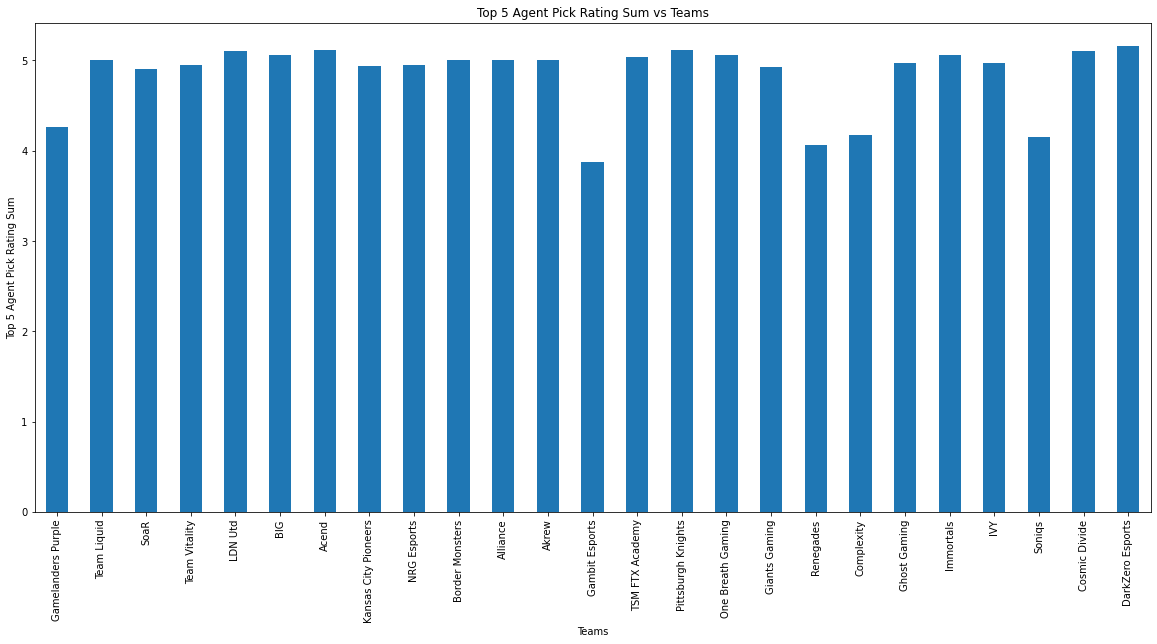

In [10]:
headers = {
        "referer": "https://www.thespike.gg/",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

url = requests.get("https://www.thespike.gg/stats/agents", headers=headers)
content = url.text

soup = BeautifulSoup(content , 'html5lib')


table = soup.find_all("table" , {"class": "sortable-table"})

dfAgents = pd.read_html(str(table))[0]

# print(dfAgents['Rating'])

AgentRatingDict = {"Phoenix": 0, 
    "Breach": 0,
    "Brimstone": 0,
    "Sage": 0,
    "Raze": 0,
    "Omen": 0,
    "Cypher": 0,
    "Viper": 0,
    "Jett": 0,
    "Reyna": 0,
    "Killjoy": 0,
    "Skye": 0,
    "Yoru": 0,
    "Astra": 0,
    "KAY/O": 0}

for i in range(0,16):
    AgentRatingDict[dfAgents['Agent'][i]] = dfAgents['Rating'][i]

teamAgentRating = []

for team in DictTeams:
    sum = 0
    keys = list(team.keys())
    keysSize = len(keys)
    # print(keys)
    sum += AgentRatingDict[keys[keysSize - 1]]
    sum += AgentRatingDict[keys[keysSize - 2]]
    sum += AgentRatingDict[keys[keysSize - 3]]
    sum += AgentRatingDict[keys[keysSize - 4]]
    sum += AgentRatingDict[keys[keysSize - 5]]
    sum = sum
    sum = float(str(round(sum, 2)))

    teamAgentRating.append(sum)

teamAgentRatingTop25 = []
for i in range(0,25):
    teamAgentRatingTop25.append(teamAgentRating[i])

# print(teamAgentRatingTop25)

dfTeams['Top 5 Agent Pick Rating Average'] = teamAgentRatingTop25
dfTeams.plot(x=('Team Names', 'Team'), y=('Top 5 Agent Pick Rating Average', ''), kind="bar", xlabel="Teams", ylabel="Top 5 Agent Pick Rating Sum", title="Top 5 Agent Pick Rating Sum vs Teams", legend=False )

Mean squared error: 15.04
Pearson's correlation, p-value
(0.5004666505614891, 0.010836634232582349)


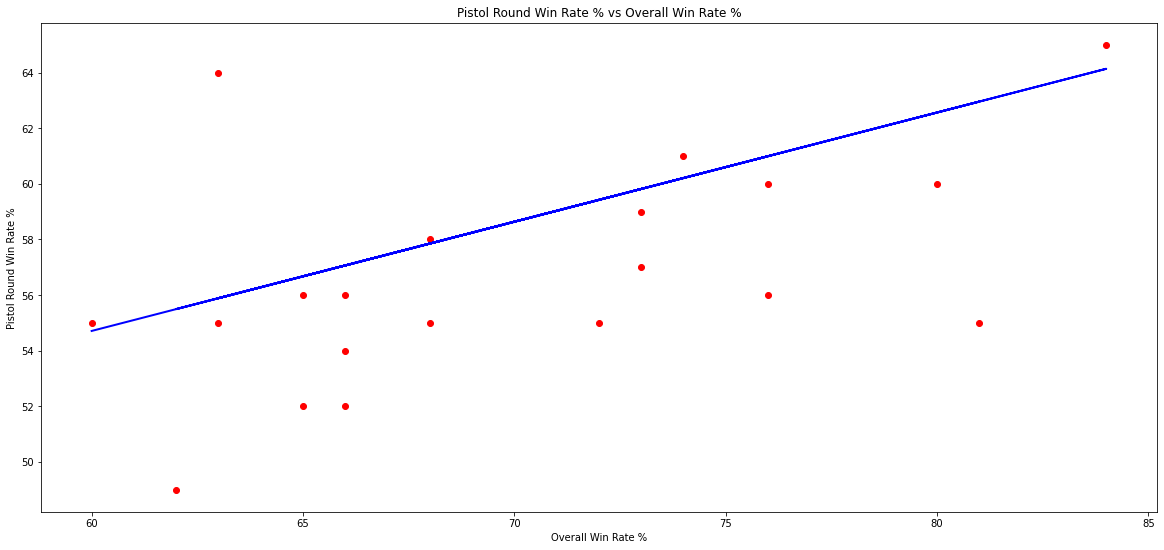

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LinearRegression
from scipy import stats


model = pd.read_csv('top25TeamsSorted.csv')
Xs = model.iloc[:, 3]
X = Xs.values

X = X[1:len(X)]

for i in range(25):
    X[i] = X[i].replace('%', '')
    X[i] = int(float(X[i]))

Ys = model['Pistol Rounds.2']
Y = Ys.values
Y = Y[1:len(Y)]

# print(Y)
for i in range(25):
    Y[i] = Y[i].replace('%', '')
    Y[i] = int(float(Y[i]))


Xs_train, Xs_test, Ys_train, Ys_test = train_test_split(X, Y, test_size=0.80)

LRmodel = LinearRegression()

LRmodel.fit(Xs_train.reshape(-1,1), Ys_train.reshape(-1,1))

LR_y_pred = LRmodel.predict(Xs_test.reshape(-1,1))

print('Mean squared error: %.2f' % mean_squared_error(Ys_test, LR_y_pred))

print("Pearson's correlation, p-value")
print(stats.pearsonr(X,Y))

# Plot
plt.scatter(Xs_test, Ys_test,  color='red')
plt.plot(Xs_test, LR_y_pred, color='blue', linewidth=2)

plt.xticks()
plt.yticks()
plt.xlabel("Overall Win Rate %")
plt.ylabel("Pistol Round Win Rate %")
plt.title("Pistol Round Win Rate % vs Overall Win Rate %")
plt.show()